# PCA 실습 4. HAR dataset

> 

</br>

## --▶ Dataset Load

In [1]:
import pandas as pd

# feature name data
url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt"

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

# X data
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep = '\s+',header=None)
X_test = pd.read_csv(X_test_url, sep = '\s+',header=None)

X_train.columns = feature_name
X_test.columns = feature_name

# y data
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

## --▶ PCA fit

### ◾ n_components=2

In [2]:
import Ch09_0_PCA_utility as util

In [3]:
HAR_pca, pca = util.get_pca_data(X_train, n_components=2)
HAR_pca.shape

(7352, 2)

In [4]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [5]:
def get_pd_from_pca(pca_data, col_num=2):
    cols = ['pca_' + str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns=cols)

In [6]:
cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [8]:
HAR_pd_pca = util.get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,action
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


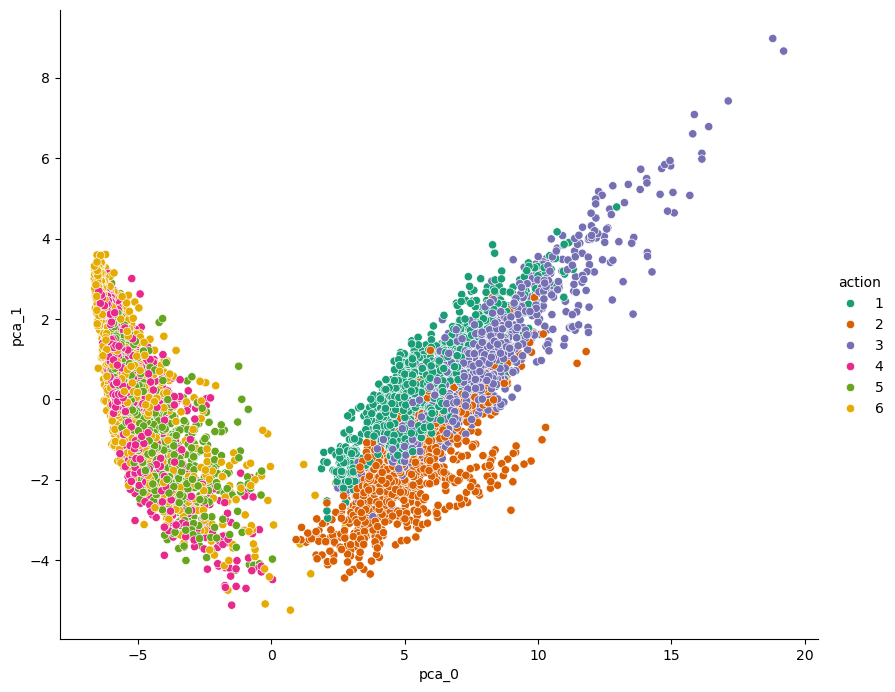

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

sns.pairplot(
	HAR_pd_pca, hue='action', palette='Dark2', height=7, aspect=1.2,
	x_vars='pca_0', y_vars='pca_1'
);
# sns.pairplot()의 전체 크기를 조절하려면 height 및 aspect 매개변수를 사용하여 pairplot의 크기와 종횡비를 조절할 수 있다., height=5

# 전체 그림 크기 조절
# plt.gcf().set_size_inches(9, 7)  # 가로 및 세로 크기 조절
# plt.show()

In [18]:
util.print_variances_ratio(pca)

variance_ratio: [0.6255444  0.04913023]
Sum of variance_ratio: 0.6746746270487931


👉 썩 성능이 좋아보이지 않는다.

- 두 성분의 데이터에 대한 설명력이 67.47% 정도밖에 안된다. <br></br>

### ◾ n_components=3

In [21]:
%%time

HAR_pca, pca = util.get_pca_data(X_train, n_components=3)
HAR_pd_pca = util.get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
display(HAR_pd_pca)

util.print_variances_ratio(pca)

,pca_0,pca_1,pca_2,action
0,-5.520280,-0.290278,-1.529929,5
1,-5.535350,-0.082530,-1.924804,5
2,-5.474988,0.287387,-2.144642,5
3,-5.677232,0.897031,-2.018220,5
4,-5.748749,1.162952,-2.139533,5
...,...,...,...,...
7347,6.253517,-2.636767,0.448229,2
7348,5.782321,-2.437814,0.462731,2
7349,5.857505,-3.081843,0.671207,2
7350,5.421095,-3.426430,0.671243,2


variance_ratio: [0.6255444  0.04913023 0.04121467]
Sum of variance_ratio: 0.7158893015785991
CPU times: total: 766 ms
Wall time: 276 ms


In [22]:
%%time

HAR_pca, pca = util.get_pca_data(X_train, n_components=10)
HAR_pd_pca = util.get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
display(HAR_pd_pca.head())

util.print_variances_ratio(pca)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,action
0,-5.520280,-0.290278,-1.529929,1.333241,1.425093,-0.194678,0.577476,0.691491,-1.223718,-0.362674,5
1,-5.535350,-0.082530,-1.924804,0.671272,0.671259,0.735098,-0.616977,-0.771743,-0.614961,-0.896240,5
2,-5.474988,0.287387,-2.144642,0.531807,0.207826,-0.037824,0.057522,0.093928,-0.062885,-0.217611,5
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079566,-0.267734,-0.731422,0.281198,0.466690,5
4,-5.748749,1.162952,-2.139533,0.207823,0.473083,0.463026,-0.152137,-0.107553,0.290661,0.539188,5


variance_ratio: [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.00969371 0.00858017]
Sum of variance_ratio: 0.8050386110730243
CPU times: total: 969 ms
Wall time: 307 ms


## --▶ Random Forest

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = dict(
	max_depth = [6,8,10],
	n_estimators = [50,100,200],
	min_samples_leaf = [8,12],
	min_samples_split = [8,12],
)

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [28]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [24]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_result_df[target_col].sort_values(by='rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
17,1,0.838683,200,8
14,1,0.838683,200,8
32,3,0.838275,200,10
35,3,0.838275,200,10
26,5,0.838139,200,10


In [25]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [26]:
grid_cv.best_score_

0.838683351468988

In [29]:
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1,))

# 🚩 X_train 데이터로 fit_transform()을 한 pca 객체로 X_text 데이터를 변형시켜주어야 한다.
# ⭐ X_test 데이터를 직접 PCA.fit_transform()시키면 데이터가 오염되는 것이다.!!!
pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.8540889039701391

## --▶ Ensemble XGboost

In [31]:
(y_train.values -1).reshape(-1,)

array([4, 4, 4, ..., 1, 1, 1], dtype=int64)

In [32]:
import time
from xgboost import  XGBClassifier

evals = [(pca.transform(X_test), y_test-1)]

start_time = time.time()

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, verbose=-1)
xgb.fit(
	HAR_pca, (y_train.values-1).reshape(-1,),
	early_stopping_rounds=10, eval_set=evals
)

print('Fit time :', time.time()-start_time)

[0]	validation_0-mlogloss:1.61499
[1]	validation_0-mlogloss:1.47654
[2]	validation_0-mlogloss:1.35904
[3]	validation_0-mlogloss:1.26392
[4]	validation_0-mlogloss:1.18124
[5]	validation_0-mlogloss:1.11055
[6]	validation_0-mlogloss:1.04626
[7]	validation_0-mlogloss:0.99004


[8]	validation_0-mlogloss:0.94028
[9]	validation_0-mlogloss:0.89338
[10]	validation_0-mlogloss:0.85094
[11]	validation_0-mlogloss:0.81654
[12]	validation_0-mlogloss:0.78285
[13]	validation_0-mlogloss:0.75242
[14]	validation_0-mlogloss:0.72457
[15]	validation_0-mlogloss:0.70005
[16]	validation_0-mlogloss:0.67783
[17]	validation_0-mlogloss:0.65790
[18]	validation_0-mlogloss:0.63869
[19]	validation_0-mlogloss:0.62145
[20]	validation_0-mlogloss:0.60502
[21]	validation_0-mlogloss:0.59039
[22]	validation_0-mlogloss:0.57597
[23]	validation_0-mlogloss:0.56287
[24]	validation_0-mlogloss:0.55024
[25]	validation_0-mlogloss:0.53949
[26]	validation_0-mlogloss:0.52902
[27]	validation_0-mlogloss:0.51912
[28]	validation_0-mlogloss:0.50987
[29]	validation_0-mlogloss:0.50016
[30]	validation_0-mlogloss:0.49249
[31]	validation_0-mlogloss:0.48425
[32]	validation_0-mlogloss:0.47691
[33]	validation_0-mlogloss:0.47038
[34]	validation_0-mlogloss:0.46401
[35]	validation_0-mlogloss:0.45798
[36]	validation_0-mlog

In [34]:
accuracy_score(y_test-1, xgb.predict(pca.transform(X_test)))

0.8635900916185952

👉 시간과 성능의 trade-off가 필요하다면,

- 500개가 넘는 features를 사용해 XGBoost를 돌리면 시간은 70.767초, 성능은 0.95

- 10개의 주성분을 뽑아 XGBoost를 돌리면 시간은 2.405초, 성능은 0.8636 이다.